In [18]:
%load_ext autoreload
%autoreload 2
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
import glob

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## check raw dataset

In [19]:
# old version
os.chdir('/home/sfp/streaming-flow-policy')
from diffusion_policy.dataset.franka_image_dataset import FrankaPickImageDataset
zarr_path = './data/pushy.zarr'
dataset = FrankaPickImageDataset(zarr_path, horizon=16)
for data in dataset:
    print('image obs shape', data['obs']['image'].shape)
    break

# new version
os.chdir('/home/sfp/streaming-flow-policy')
from diffusion_policy.dataset.franka_image_dataset import FrankaPickImageDataset
zarr_path = './data/pushy_v3.zarr'
dataset = FrankaPickImageDataset(zarr_path, horizon=16, two_images=True)
for data in dataset:
    break
for k in data['obs'].keys():
    print(k, data['obs'][k].shape)

Loading FrankaImageDataset from ./data/pushy.zarr


image obs shape torch.Size([16, 3, 256, 256])
Loading FrankaImageDataset from ./data/pushy_v3.zarr
image torch.Size([16, 3, 256, 256])
image2 torch.Size([16, 3, 256, 256])
agent_pos torch.Size([16, 10])


### visualizations

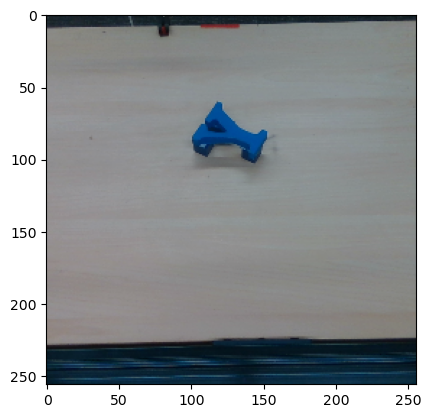

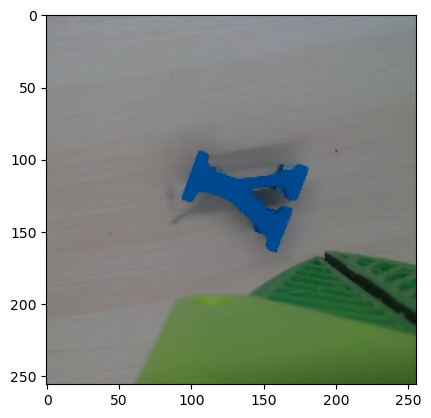

In [ ]:
# Visualize the images from different cameras
plt.imshow(data['obs']['image'][0].permute(1, 2, 0))
plt.show()
plt.imshow(data['obs']['image2'][1].permute(1, 2, 0))
plt.show()

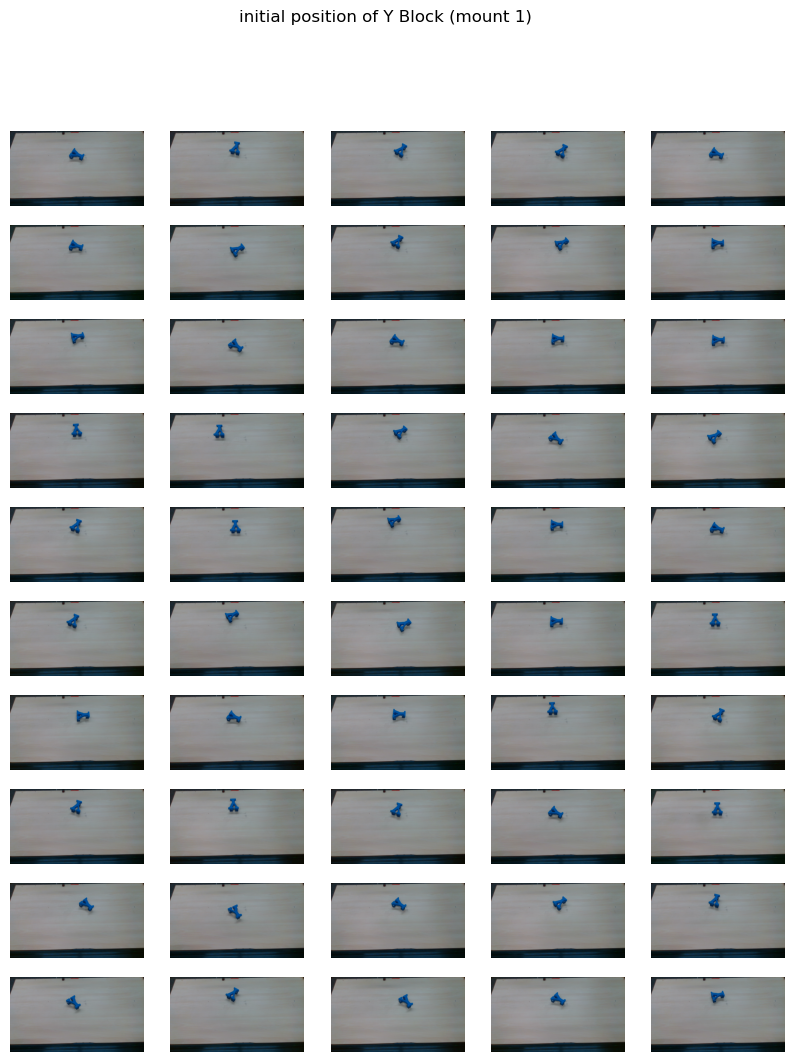

In [ ]:
# make a 5×10 grid of subplots of initial images of each episode
fig, axes = plt.subplots(10, 5, figsize=(10, 12))
axes = axes.flatten()

for ax, path in zip(axes,glob.glob('/home/sfp/streaming-flow-policy/data_unprocessed/pushy_v2/**.pkl')):
    # "/home/sfp/streaming-flow-policy/data_unprocessed/pushy/trajectory_20250613-154550.pkl"
    with open(path, 'rb') as f:
        data = pickle.load(f)
        ax.imshow(data[0]['mount1']['rgb_im'])
        ax.axis('off')

# plt.tight_layout()
plt.suptitle('initial position of Y Block (mount 1)')
plt.show()

In [ ]:
# check the initial image of each episode
for path in glob.glob('/home/sfp/pushy_v2/**.pkl'):
    # "/home/sfp/streaming-flow-policy/data_unprocessed/pushy/trajectory_20250613-154550.pkl"
    with open(path, 'rb') as f:
        data = pickle.load(f)
        plt.imshow(data[0]['mount2']['rgb_im'])
        plt.title(path)
        plt.axis('off')
        plt.show()

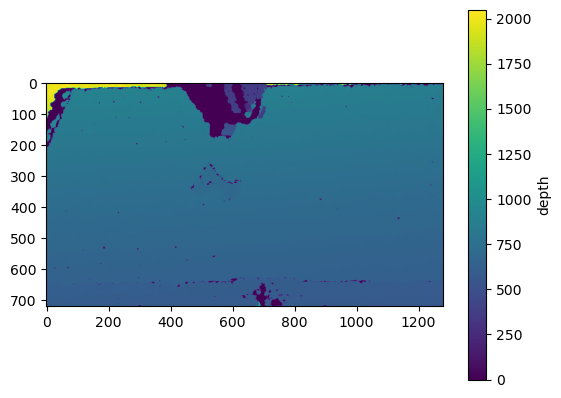

In [ ]:
# depth image
plt.imshow(data[0]['mount1']['dep_im'], vmin=0, vmax=2048)
plt.colorbar(label='depth')

### [do not run] remove first frame

In [ ]:
### remove the first frame of each episode
# for path in glob.glob('/home/sfp/pushy_v2/**.pkl'):
#     with open(path, 'rb') as f:
#         data = pickle.load(f)

#     with open(path, 'wb') as f:
#         pickle.dump(data[1:], f)

### pickle file structure and shape checks

In [39]:
for k in data[0]:
    print(k)
print('\n')
for k in data[0]['mount1']:
    print(k)

ee_pose
qpos
gripper_state
robot1_hand
mount2
mount1
camera_configs


rgb_im
dep_im
intrinsics
timestamp


In [43]:
data[0]['mount1']['rgb_im'].shape

(720, 1280, 3)

In [40]:
data[0]['mount1']['timestamp']

datetime.datetime(2025, 6, 16, 22, 49, 34, 98731)

In [26]:
data[0]['gripper_state']

array(2.62666663e-06)

In [ ]:
data[0]['ee_pose'] # end-effector pose 

array([[ 0.13140207, -0.9902285 , -0.04670104,  0.45518458],
       [-0.9893691 , -0.13395762,  0.05660485, -0.43088768],
       [-0.06230769,  0.03876657, -0.99730382,  0.26732932],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [ ]:
data[0]['qpos'] # joint angles

array([-0.61211182,  0.33484123, -0.16593773, -1.76603325,  0.0693267 ,
        2.02252893,  1.41938525])

In [21]:
data[0]['robot1_hand']['dep_im'].shape

(720, 1280)

## processed zarr data

In [20]:
import zarr

# point to the folder containing .zarray/.zattrs
root = zarr.open_group('/home/sfp/streaming-flow-policy/data/pushy_v3.zarr', mode='r')

In [21]:
# assuming your images live under the "data/img" path
img_arr = root['data']['img']
# inspect its shape, e.g. (N, H, W, 3) or (H, W, 3)
print(img_arr.shape, img_arr.dtype)

(17792, 256, 256, 3) uint8


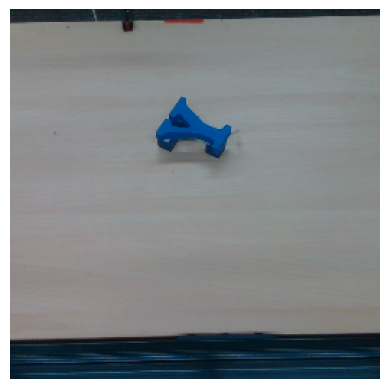

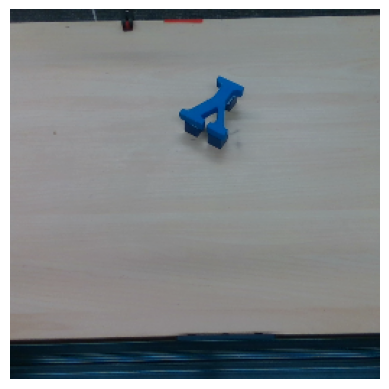

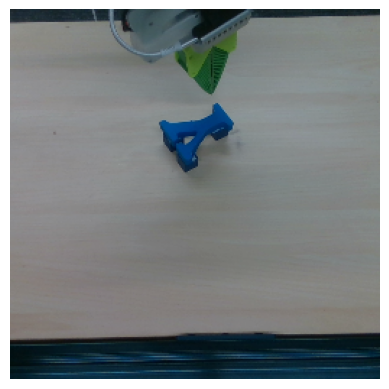

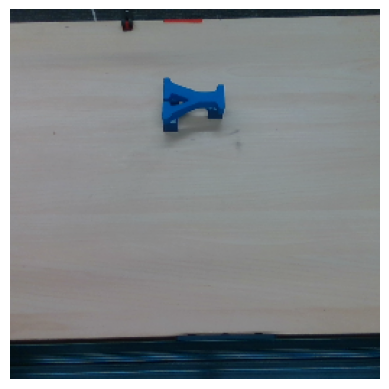

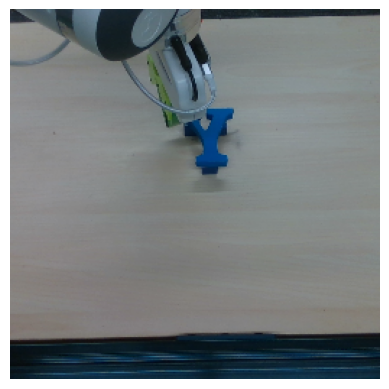

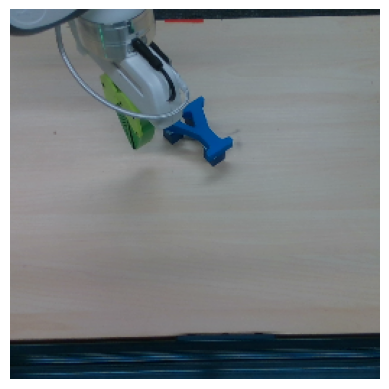

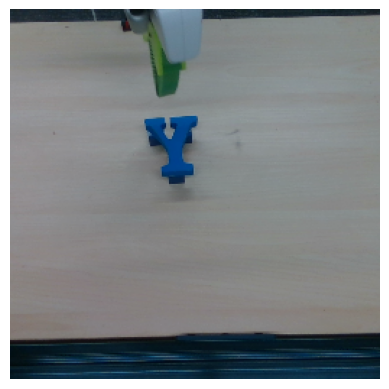

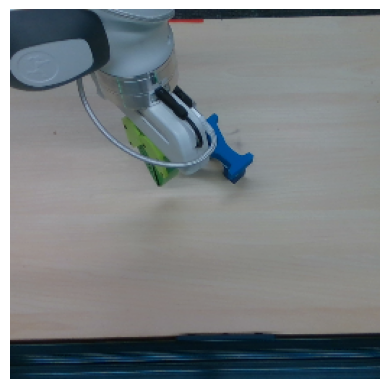

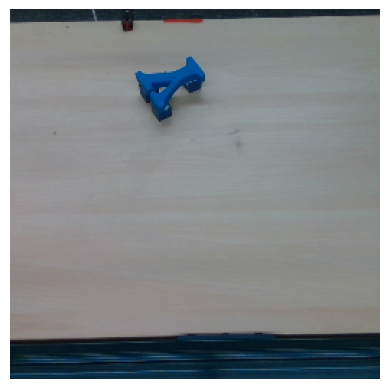

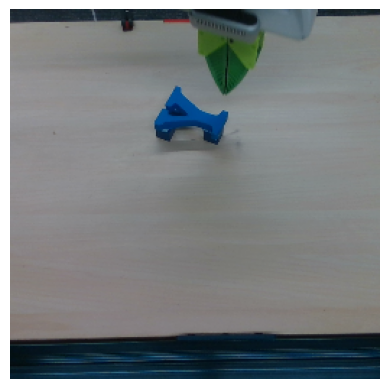

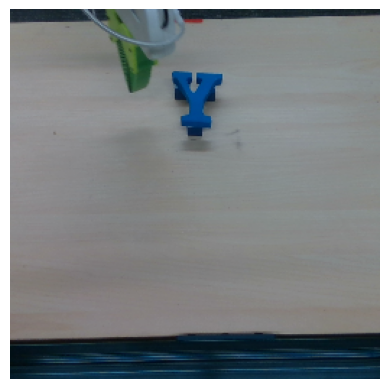

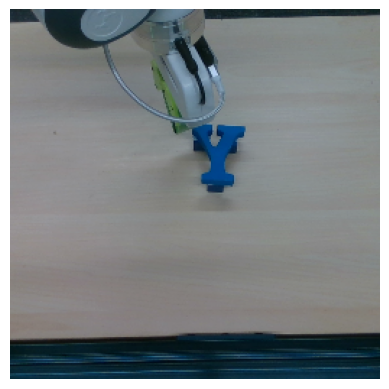

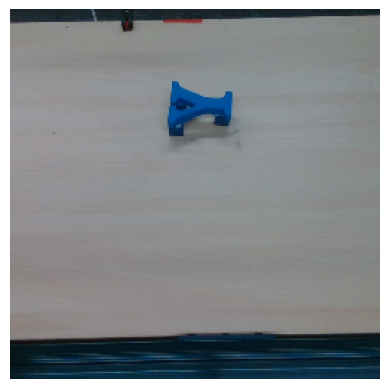

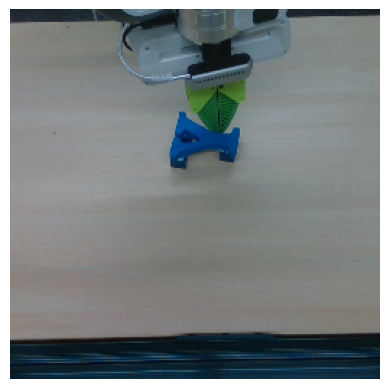

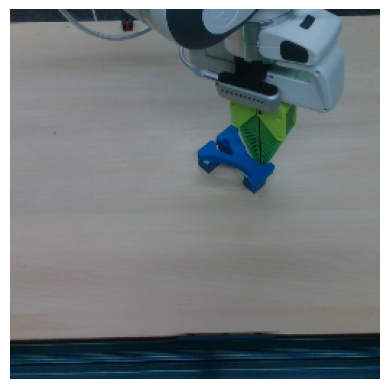

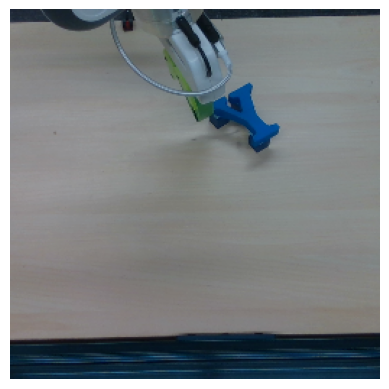

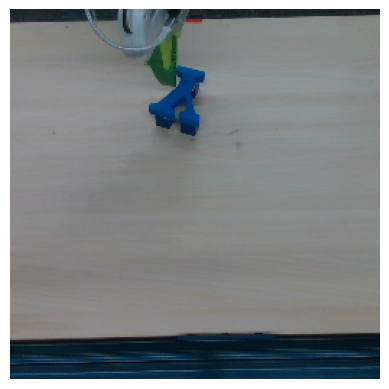

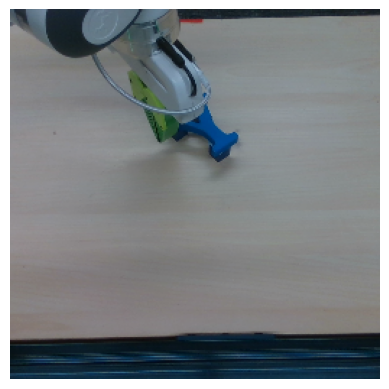

In [22]:
# visualize the processed iamges
import matplotlib.pyplot as plt
for img in img_arr[::1000]:

    plt.imshow(img)
    plt.axis('off')    # hide axes
    plt.show()